In [4]:
def plotfour(spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import astropy.units as u
    import math

    plt.rcParams['figure.figsize'] = [12, 5]
    plt.rcParams.update({'font.size': 12})
    #df1 = pd.read_csv(\"SN2022hrs_G430L_20220422.32.dat\", sep=' ', header=None)
    #df2 = pd.read_csv(\"SN20222hrs_muv_20220422.4.dat\", sep=' ', header=None)
    #arr = []
    wavelength1=[]
    flux1=[]
    wavelength2=[]
    flux2=[]
    wavelength3=[]
    flux3=[]
    wavelength4=[]
    flux4=[]
    flux4err=[]
    flux3err=[]
    flux2err=[]
    flux1err=[]
    high=[]
    flux5=[]
    wavelength5=[]
    flux5err=[]
    
    f1 = open(spec1, 'r')
    for line in f1:
        line = line.strip()
        columns = line.split()
        if columns[0][0] != '#':
            if math.isnan(float(columns[1])) == False:
                wavelength1=np.append(wavelength1,float(columns[0]))
            if math.isnan(float(columns[1])) == False:
                flux1=np.append(flux1,float(columns[1]))
            #flux2err.append(float(columns[2]))
    f1.close()    


    f2 = open(spec2, 'r')
    for line in f2:
        line = line.strip()
        columns = line.split()
        if columns[0][0] != '#':
            if math.isnan(float(columns[1])) == False:
                wavelength2=np.append(wavelength2,float(columns[0]))
            if math.isnan(float(columns[1])) == False:
                flux2=np.append(flux2,float(columns[1]))
            #flux2err.append(float(columns[2]))
    f2.close() 
    


    f3 = open(spec3, 'r')
    for line in f3:
        line = line.strip()
        columns = line.split()
        if columns[0][0] != '#':
            if math.isnan(float(columns[1])) == False:
                wavelength3=np.append(wavelength3,float(columns[0]))
            if math.isnan(float(columns[1])) == False:
                flux3=np.append(flux3,float(columns[1]))
        #flux3err.append(float(columns[2]))
    f3.close()    



    f4 = open(spec4, 'r')
    for line in f4:
        line = line.strip()
        columns = line.split()
        if columns[0][0] != '#':
            if math.isnan(float(columns[1])) == False:
                wavelength4=np.append(wavelength4,float(columns[0]))
            if math.isnan(float(columns[1])) == False:
                flux4=np.append(flux4,float(columns[1]))
            #flux4err.append(float(columns[2]))
    flux4=np.array(flux4)
    f4.close()    

    #wavelength1, flux1, flux1err=smoothspec(np.array(wavelength1), np.array(flux1), np.array(flux1err))
    #wavelength2, flux2, flux2err=smoothspec(np.array(wavelength2), np.array(flux2), np.array(flux2err))
    #wavelength3, flux3, flux3err=smoothspec(np.array(wavelength3), np.array(flux3), np.array(flux3err))
    #wavelength4, flux4, flux4err=smoothspec(np.array(wavelength4), np.array(flux4), np.array(flux4err))
    
    wavelength1, flux1=smoothspec(np.array(wavelength1)/(1.0+z1), np.array(flux1))
    wavelength2, flux2=smoothspec(np.array(wavelength2)/(1.0+z2), np.array(flux2))
    wavelength3, flux3=smoothspec(np.array(wavelength3)/(1.0+z3), np.array(flux3))
    wavelength4, flux4=smoothspec(np.array(wavelength4)/(1.0+z4), np.array(flux4))

    
    plt.plot(wavelength1, flux1*scale1, 'black', label=spec1)
    plt.plot(wavelength2, flux2*scale2, 'violet', label=spec2)
    plt.plot(wavelength3, flux3*scale3, 'green', label=spec3)
    plt.plot(wavelength4, flux4*scale4, 'red', label=spec4)
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')
    plt.xlim([1400,10000])
    plt.yscale('log')
    plt.ylim([10.0**(-18),10.0**(-13)])
    plt.legend()
    plt.show()


    
    return()

In [5]:
def smoothspec(inputwave, inputflux):

    import numpy as np
    import astropy.units as u
    from specutils import Spectrum1D
    from specutils.manipulation import FluxConservingResampler
    #input_spectra = Spectrum1D(flux=inputflux * u.Unit('erg cm-2 s-1 AA-1'), spectral_axis=inputwave * u.AA, uncertainty=inputfluxerr)
    input_spectra = Spectrum1D(flux=inputflux * u.Unit('erg cm-2 s-1 AA-1'), spectral_axis=inputwave * u.AA)
    resample_grid = np.arange(int(min(inputwave/10))*10, int(max(inputwave/10))*10, 10)*u.AA
    fluxc_resample = FluxConservingResampler()
    output_spectrum1D = fluxc_resample(input_spectra, resample_grid) 
    outputwave, outputflux=output_spectrum1D.spectral_axis, output_spectrum1D.flux

    return(outputwave, outputflux)

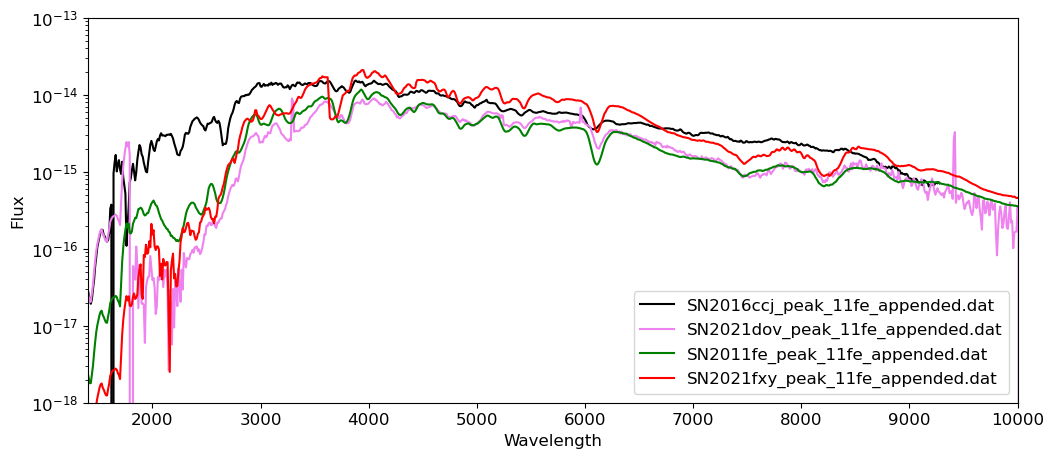

()

In [7]:
spec1='SN2016ccj_peak_11fe_appended.dat'
spec2='SN2021dov_peak_11fe_appended.dat'
spec3='SN2011fe_peak_11fe_appended.dat'
spec4='SN2021fxy_peak_11fe_appended.dat'
z1=0.000804
z2=0.0047
z3=0.0047
z4=0.0047
scale1=10
scale2=1
scale3=.011
scale4=1
plotfour(spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)

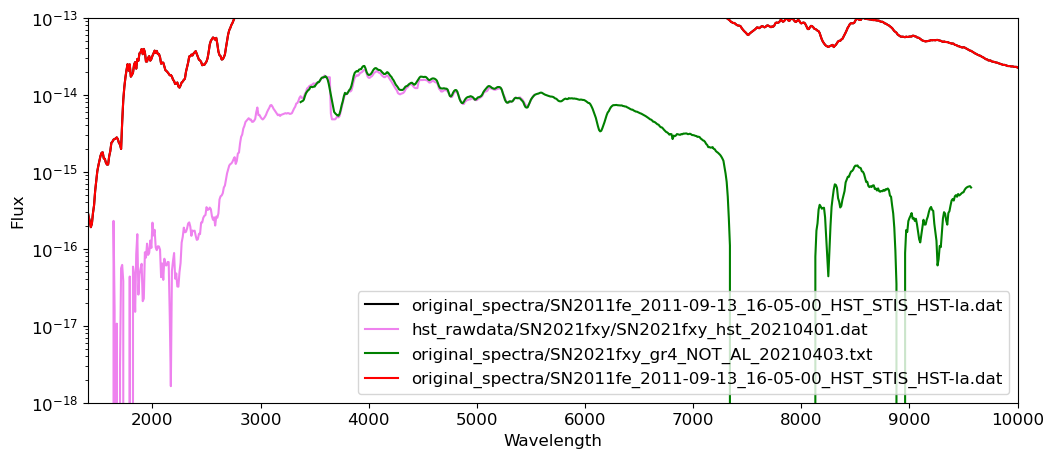

2.298811893546691e-16 erg / (Angstrom cm2 s)


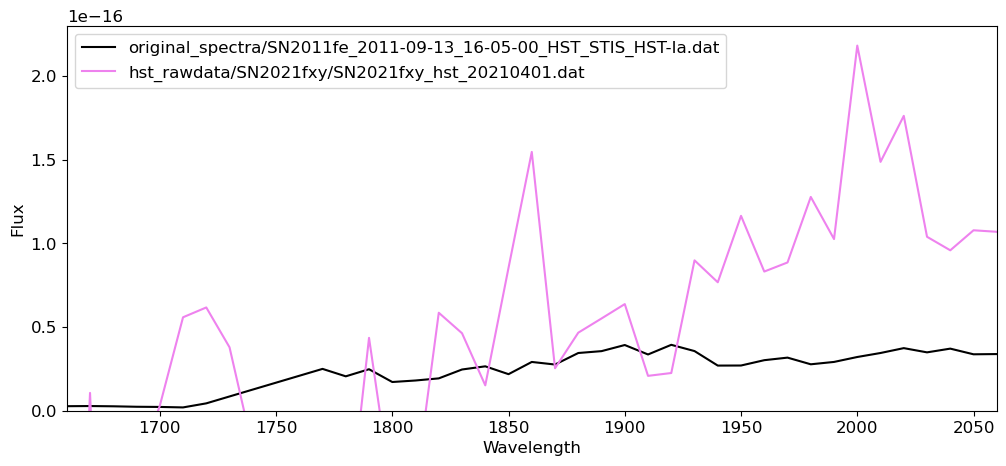

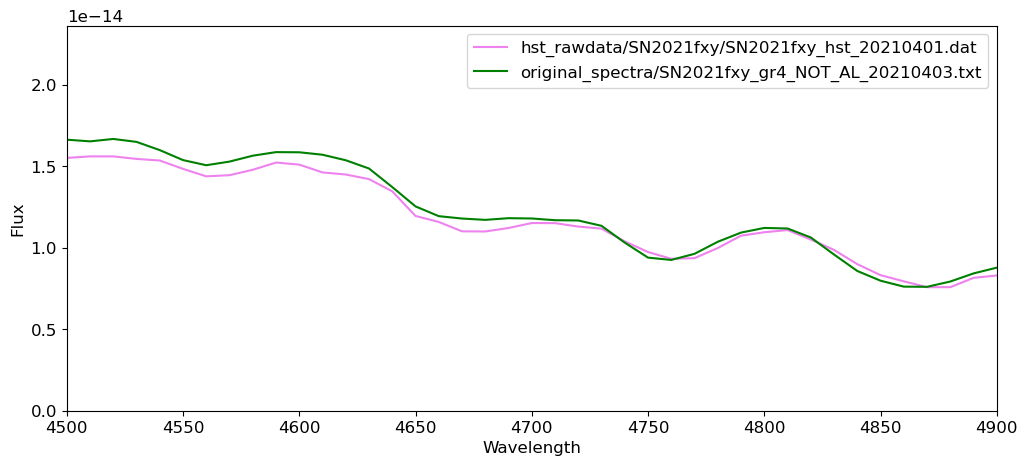

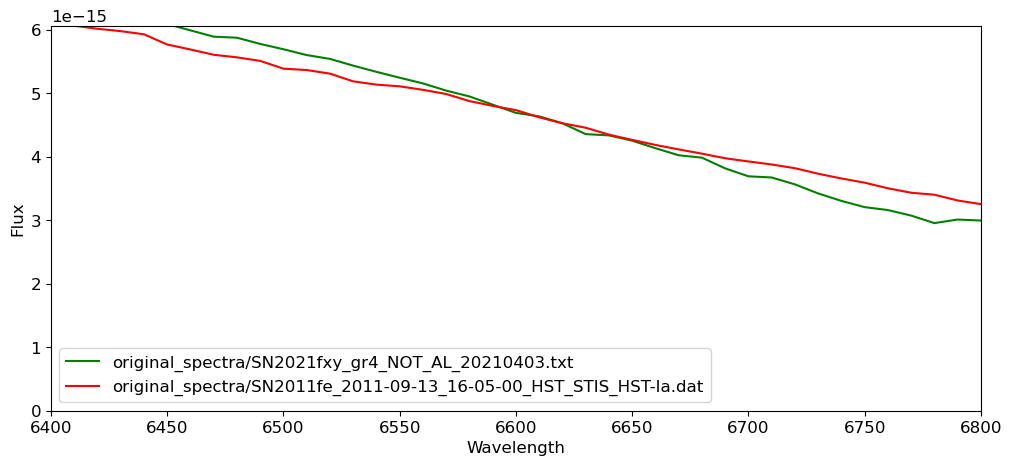

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


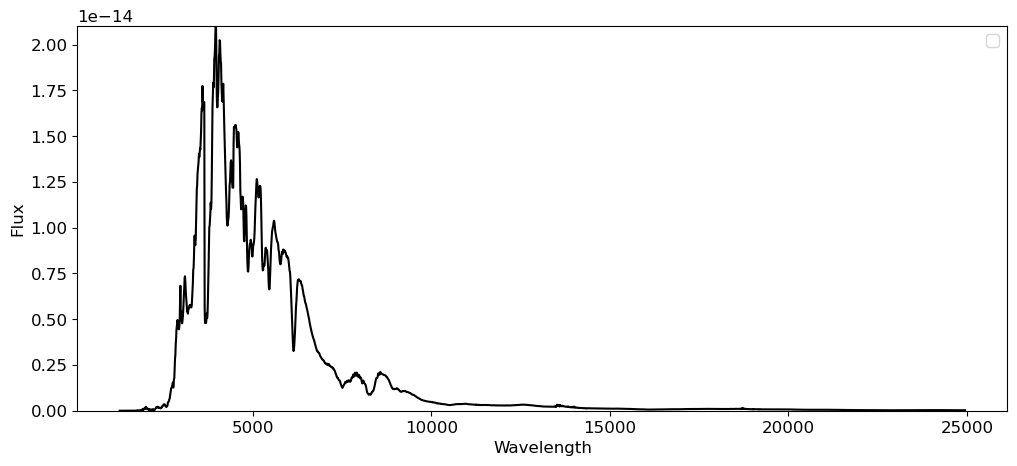

()

In [198]:
spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='hst_rawdata/SN2021fxy/SN2021fxy_hst_20210401.dat'
spec3='original_spectra/SN2021fxy_gr4_NOT_AL_20210403.txt'
spec4='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
outputfilename='kcorrectiontemplates/SN2021fxy_peak_11fe_appended.dat'
z1=0.000804
z2=0.0094
z3=0.0094
z4=0.000804
scale1=0.001
scale2=1
scale3=0.975
scale4=0.021
trim1=1860
trim2=4700
trim3=6600
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)

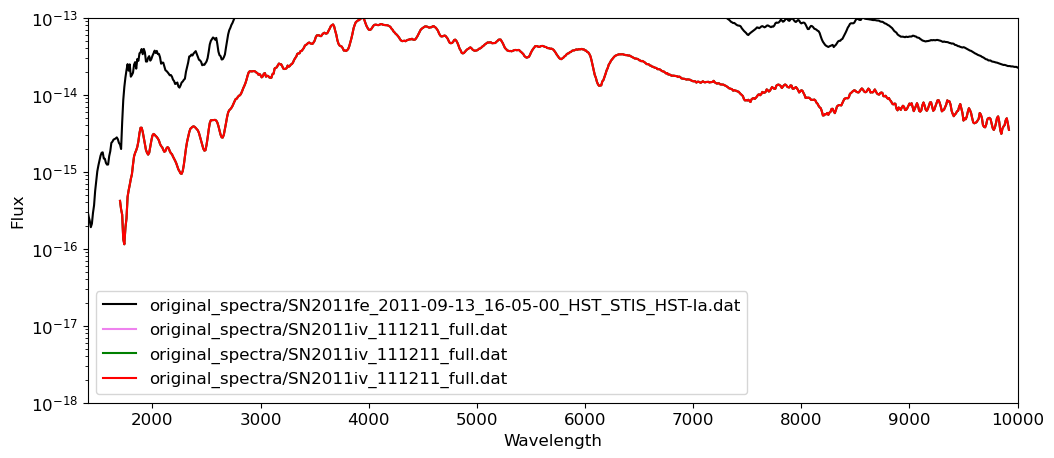

3.726223547928153e-15 erg / (Angstrom cm2 s)


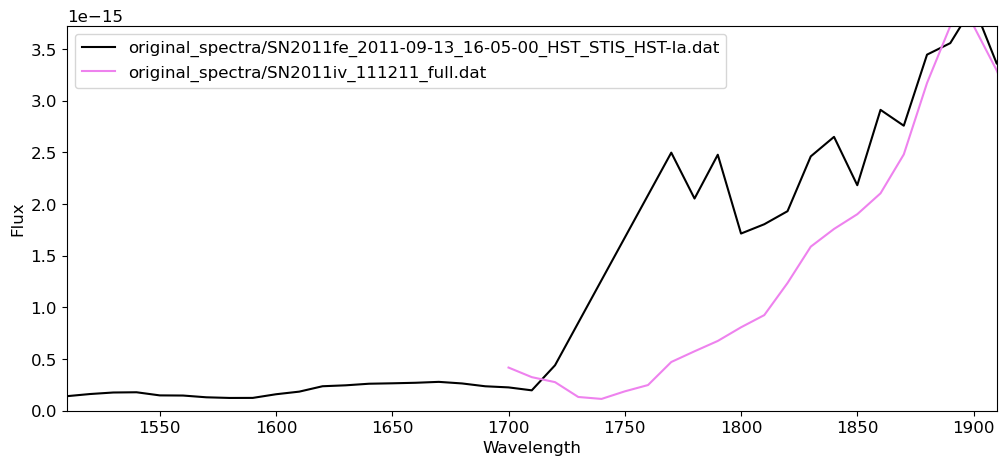

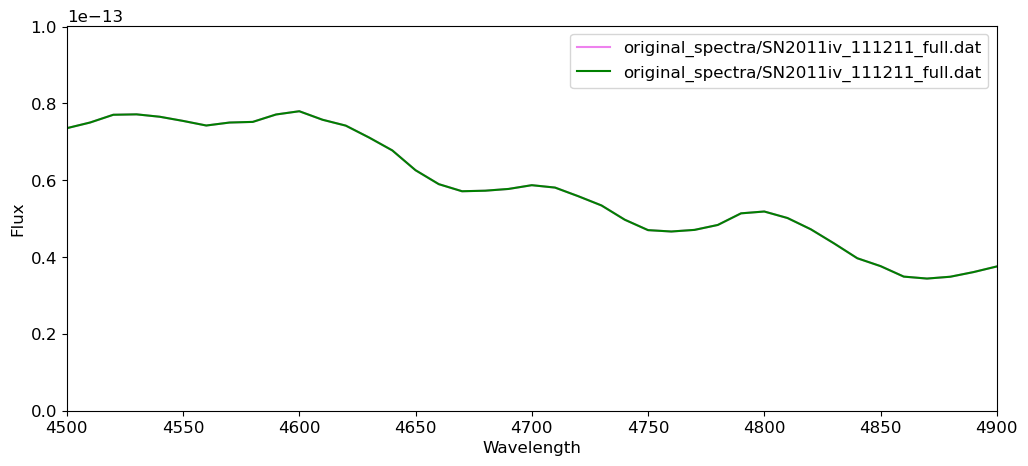

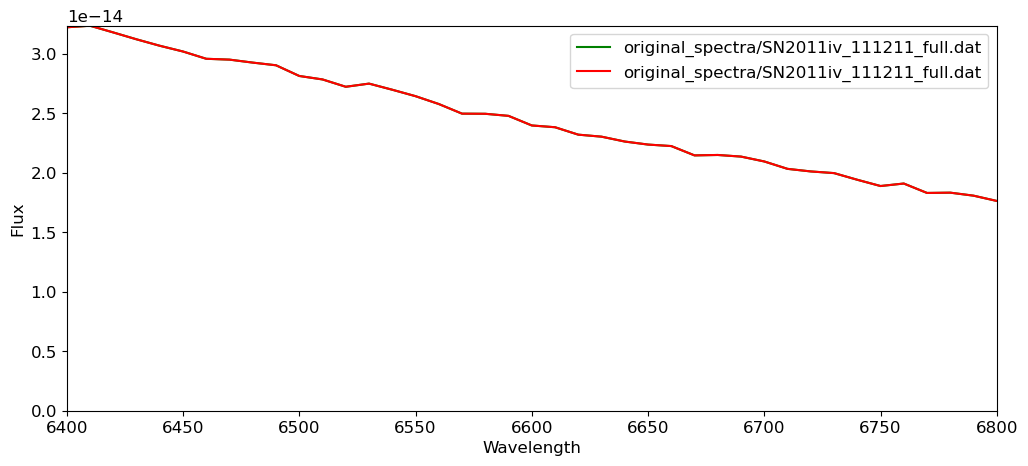

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


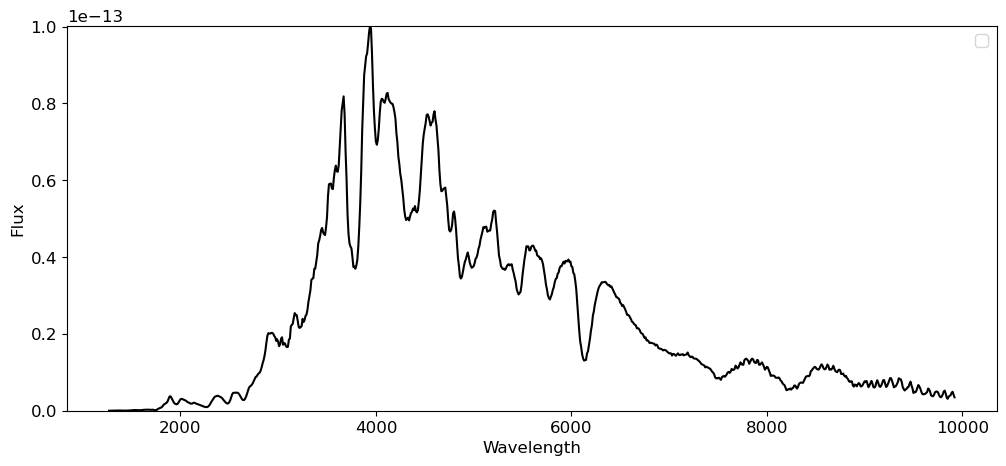

()

In [199]:
spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='original_spectra/SN2011iv_111211_full.dat'
spec3='original_spectra/SN2011iv_111211_full.dat'
spec4='original_spectra/SN2011iv_111211_full.dat'
outputfilename='kcorrectiontemplates/SN2011iv_peak_11fe_appended.dat'
z1=0.000804
z2=0.00649
z3=0.00649
z4=0.00649
scale1=0.1
scale2=1
scale3=1
scale4=1
trim1=1710
trim2=4700
trim3=6600
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)

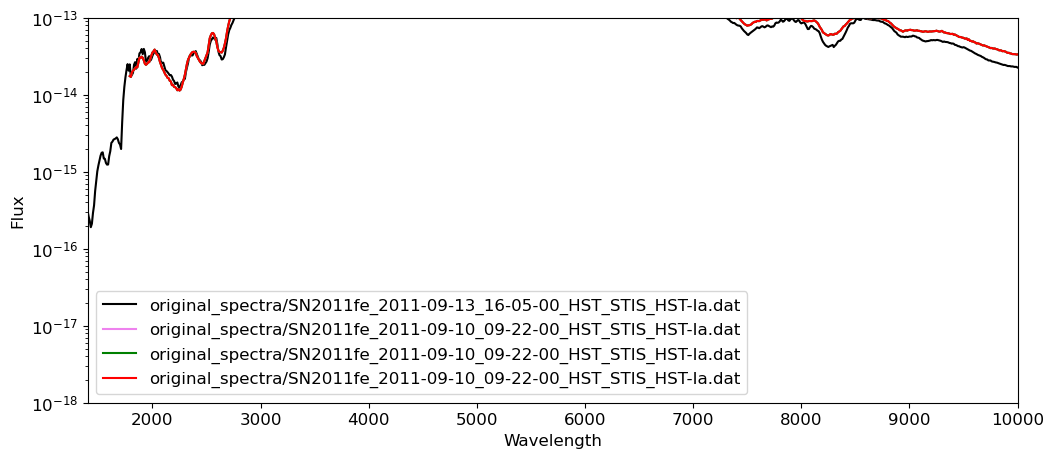

3.85475480974696e-14 erg / (Angstrom cm2 s)


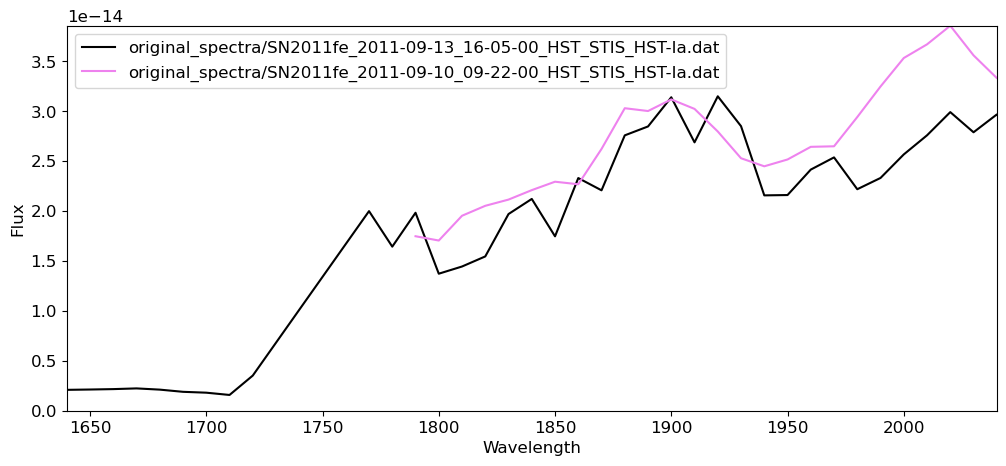

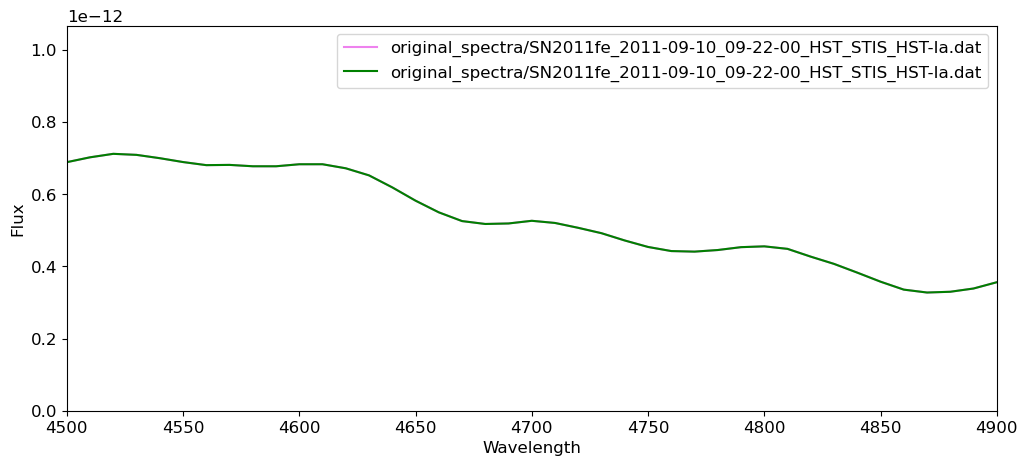

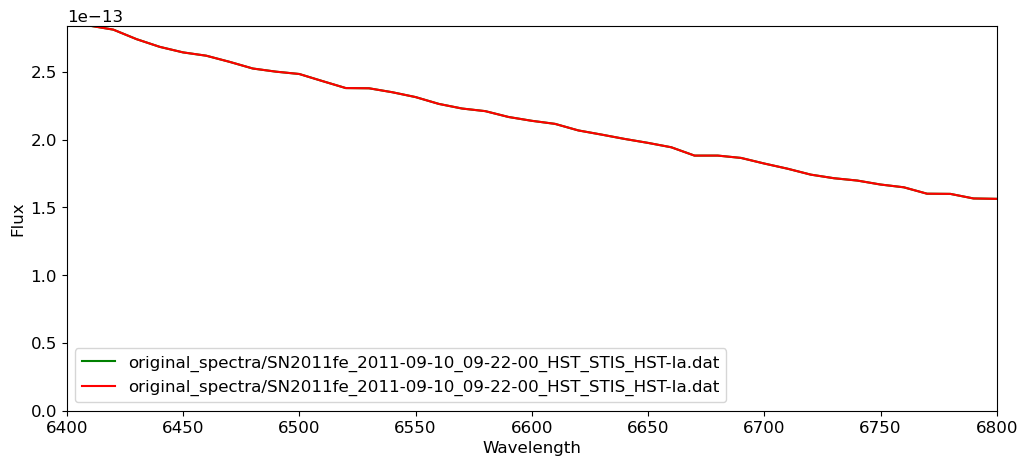

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


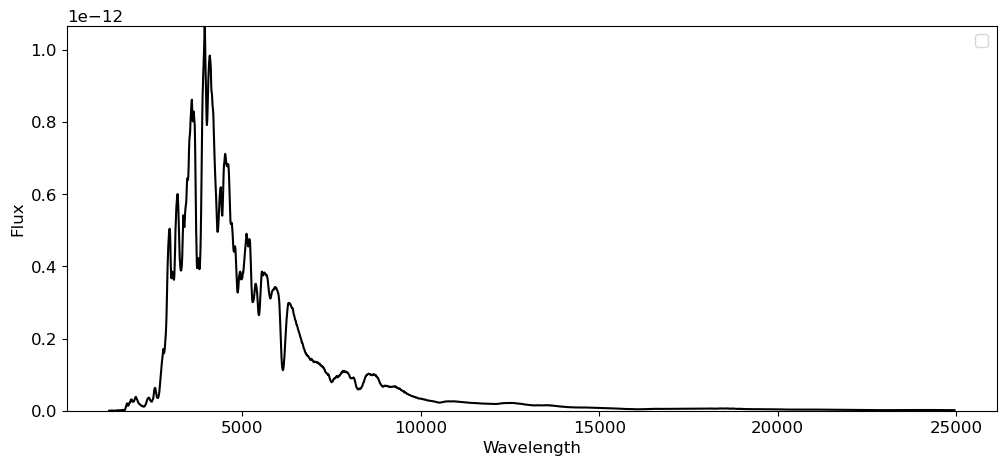

()

In [200]:
spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='original_spectra/SN2011fe_2011-09-10_09-22-00_HST_STIS_HST-Ia.dat'
spec3='original_spectra/SN2011fe_2011-09-10_09-22-00_HST_STIS_HST-Ia.dat'
spec4='original_spectra/SN2011fe_2011-09-10_09-22-00_HST_STIS_HST-Ia.dat'
outputfilename='kcorrectiontemplates/SN2011fe_peak_11fe_appended.dat'
z1=0.000804
z2=0.000804
z3=0.000804
z4=0.000804
scale1=0.8
scale2=1
scale3=1
scale4=1
trim1=1840
trim2=4700
trim3=6600
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)

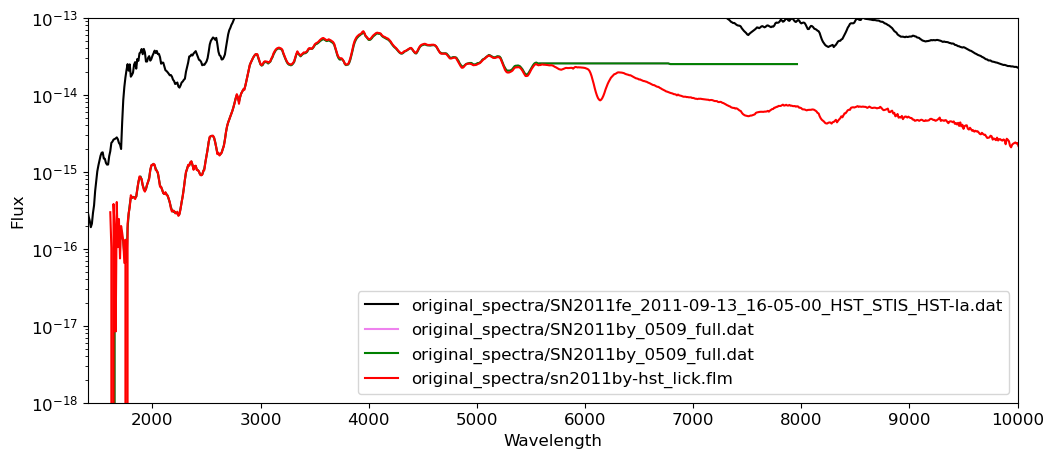

8.645223696998902e-16 erg / (Angstrom cm2 s)


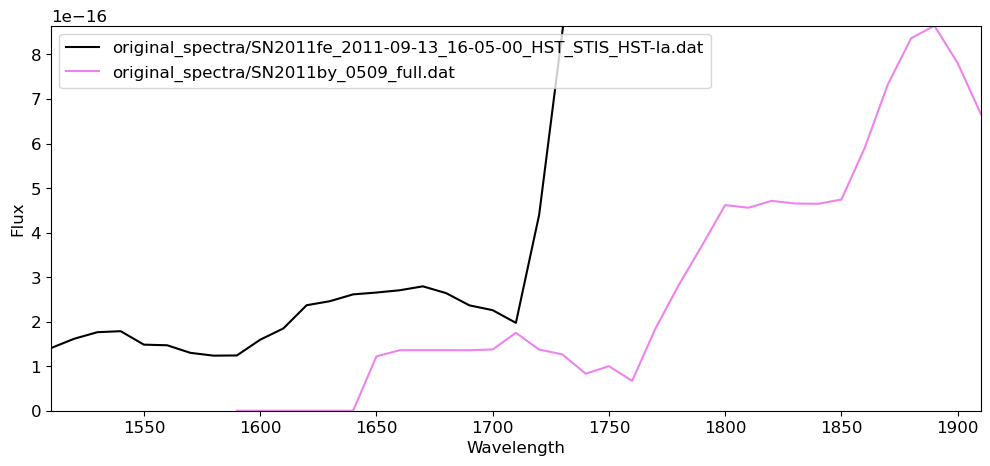

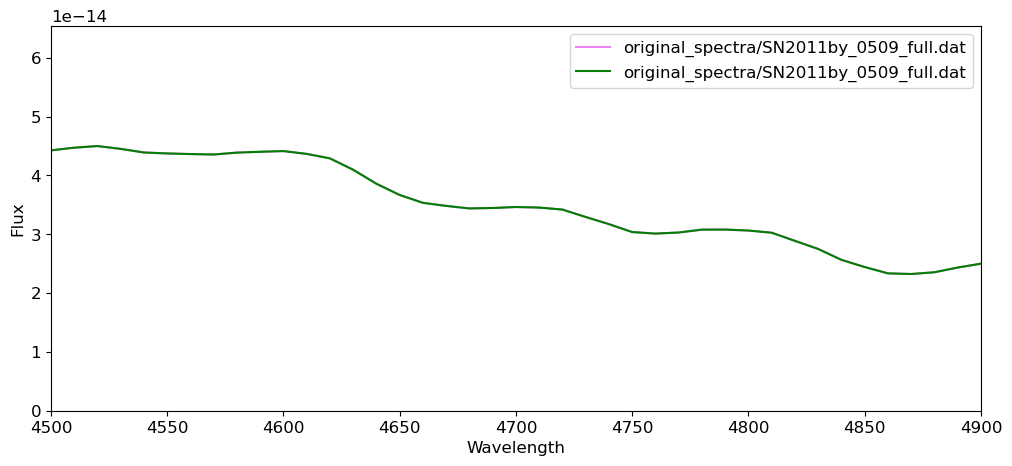

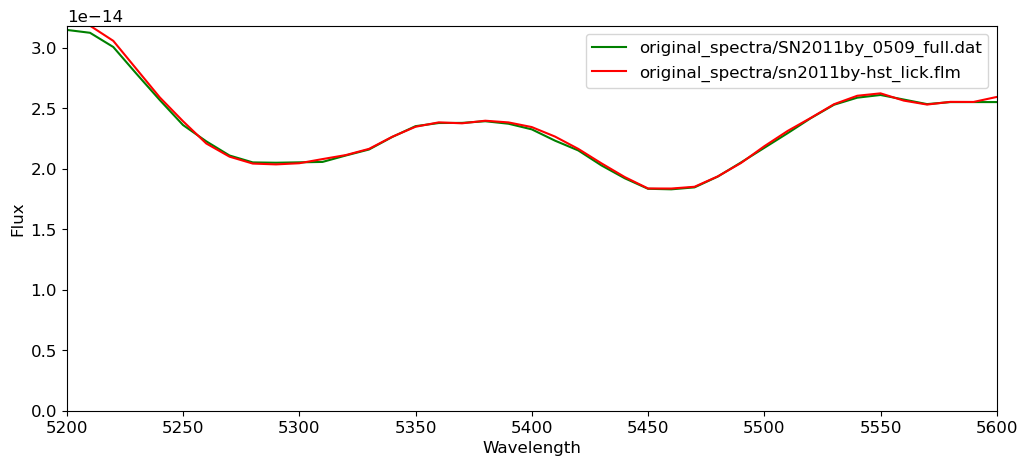

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


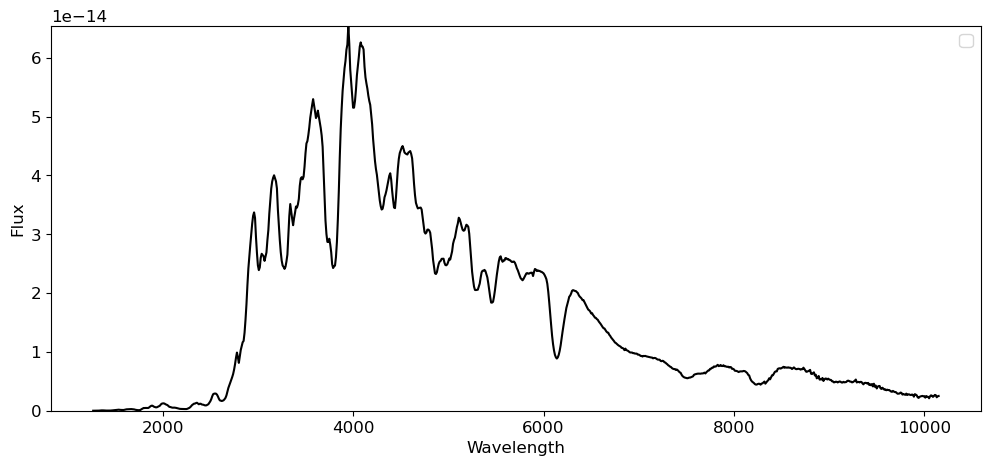

()

In [201]:
spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='original_spectra/SN2011by_0509_full.dat'
spec3='original_spectra/SN2011by_0509_full.dat'
spec4='original_spectra/sn2011by-hst_lick.flm'
outputfilename='kcorrectiontemplates/SN2011by_peak_11fe_appended.dat'
z1=0.000804
z2=0.002843
z3=0.002843
z4=0.002843
scale1=0.1
scale2=1
scale3=1
scale4=1.05
trim1=1710
trim2=4700
trim3=5400
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)

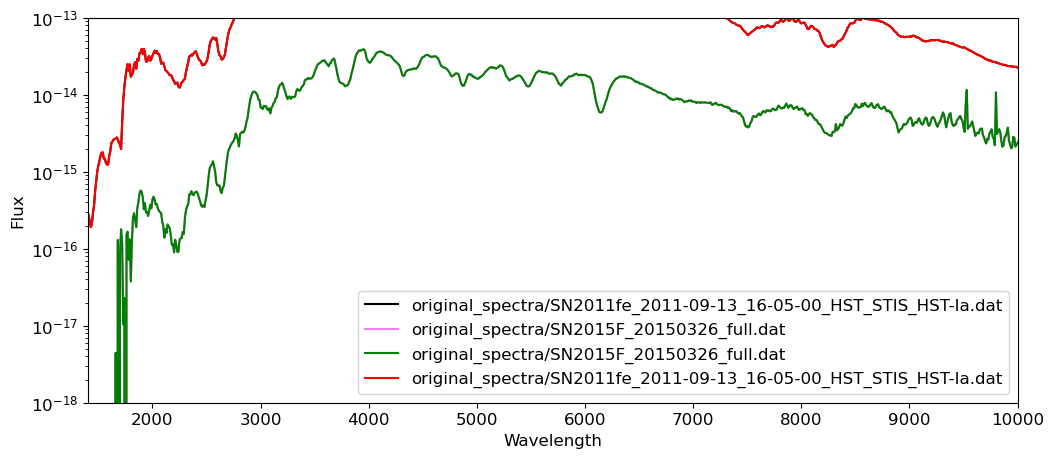

5.693690420338562e-16 erg / (Angstrom cm2 s)


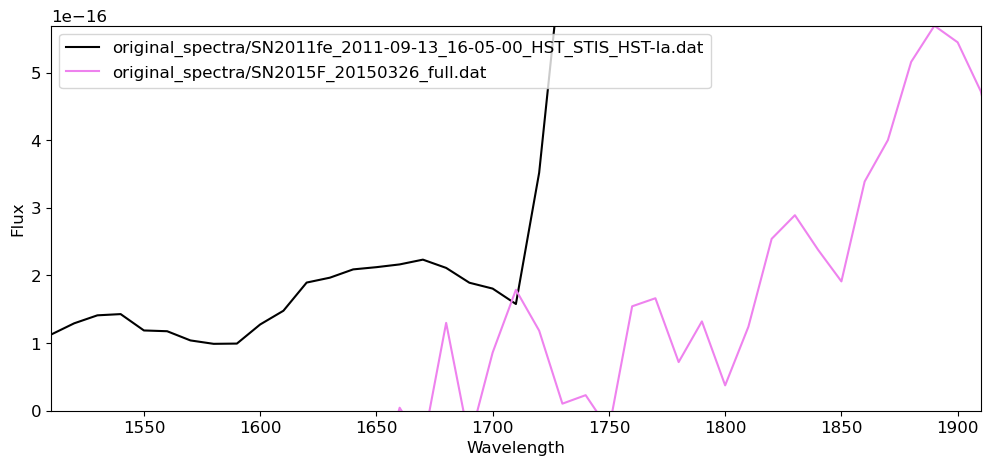

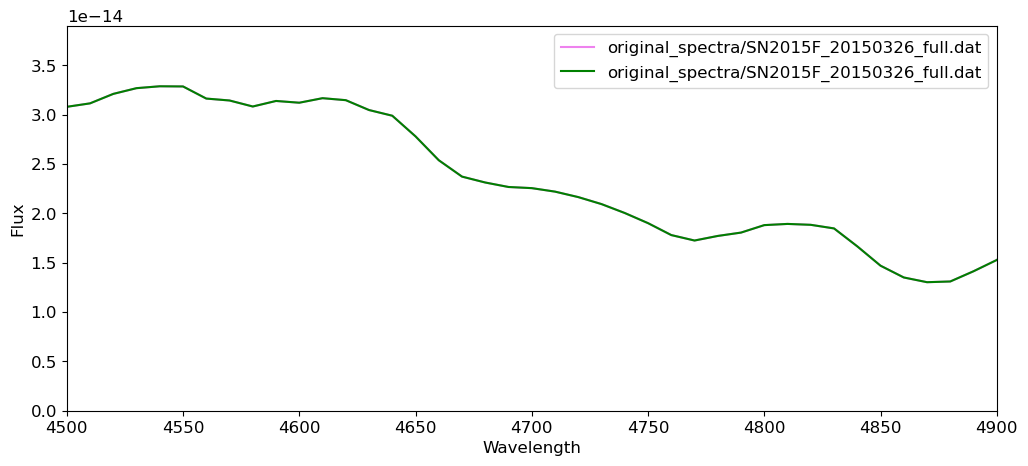

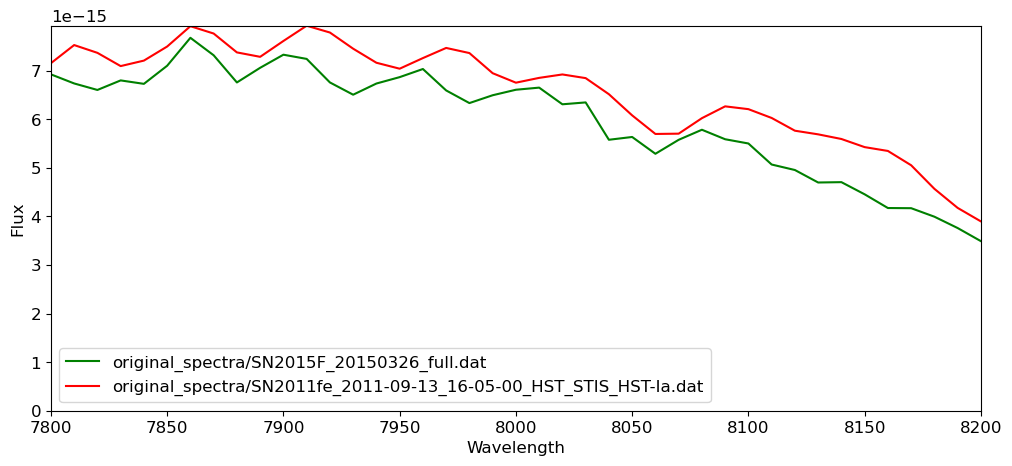

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


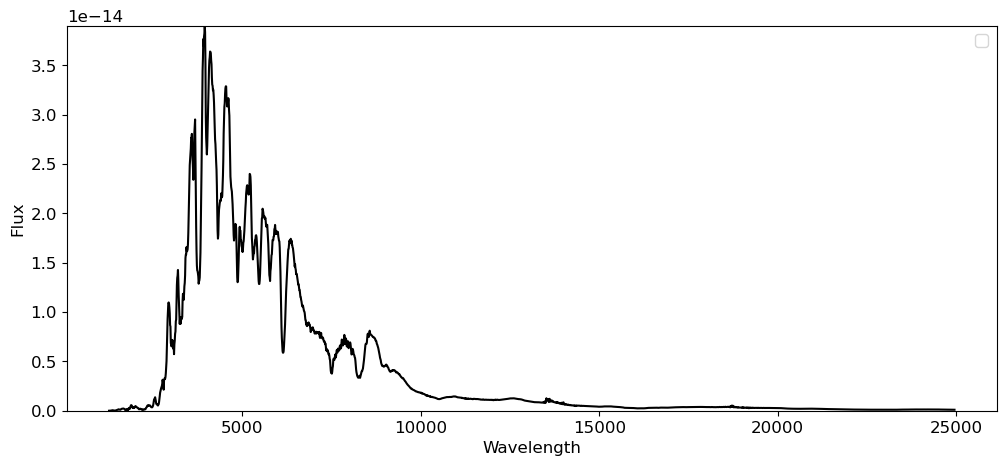

()

In [208]:
spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='original_spectra/SN2015F_20150326_full.dat'
spec3='original_spectra/SN2015F_20150326_full.dat'
spec4='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
outputfilename='kcorrectiontemplates/SN2015F_peak_11fe_appended.dat'
z1=0.000804
z2=0.0049
z3=0.0049
z4=0.000804
scale1=0.08
scale2=1
scale3=1
scale4=0.08
trim1=1710
trim2=4700
trim3=8000
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)

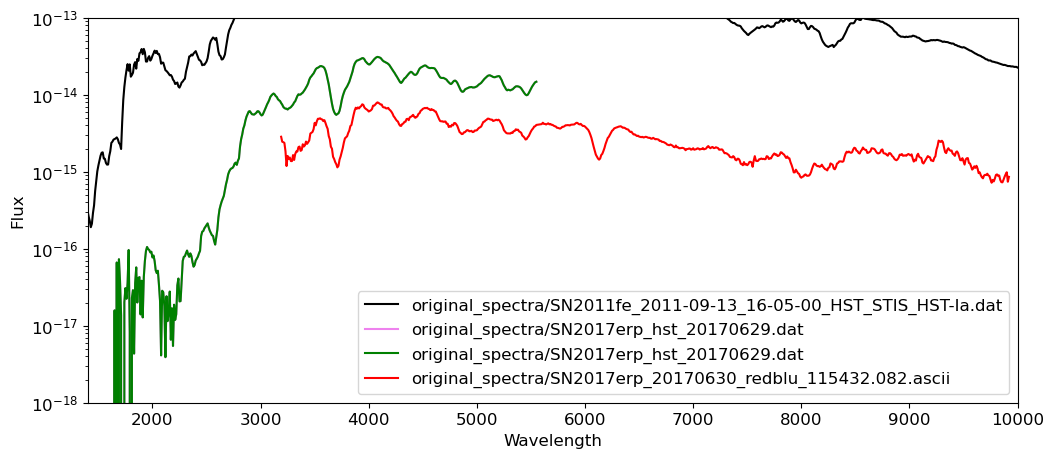

9.630260833573103e-17 erg / (Angstrom cm2 s)


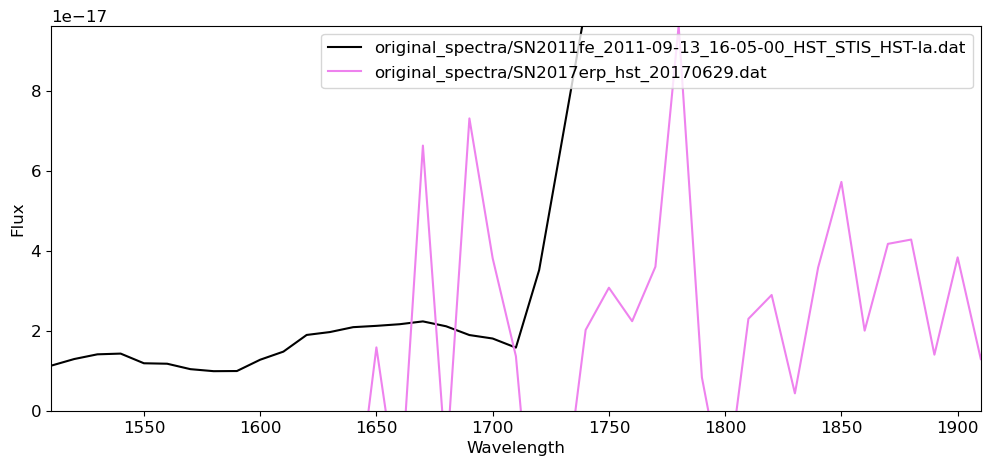

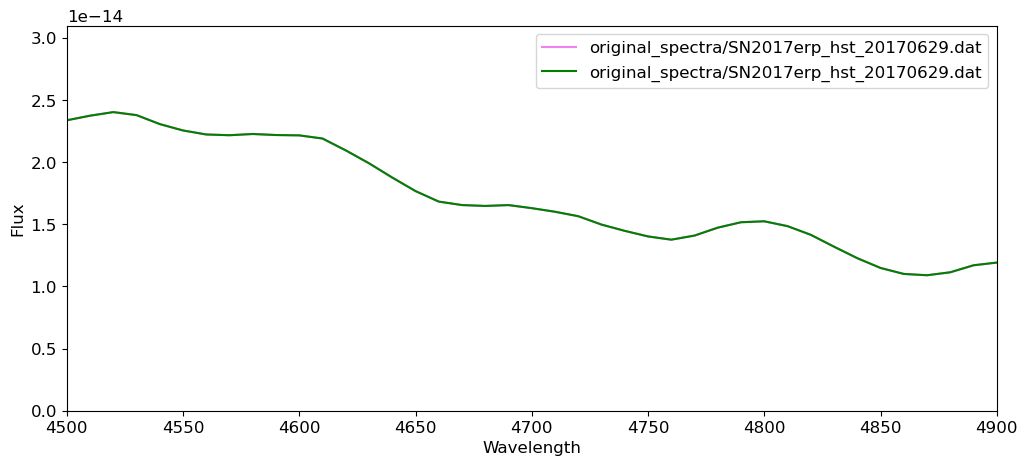

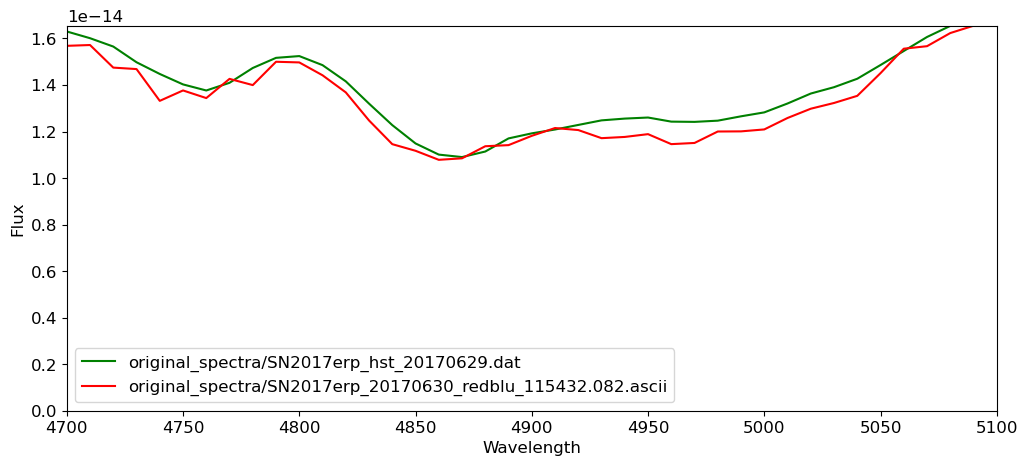

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


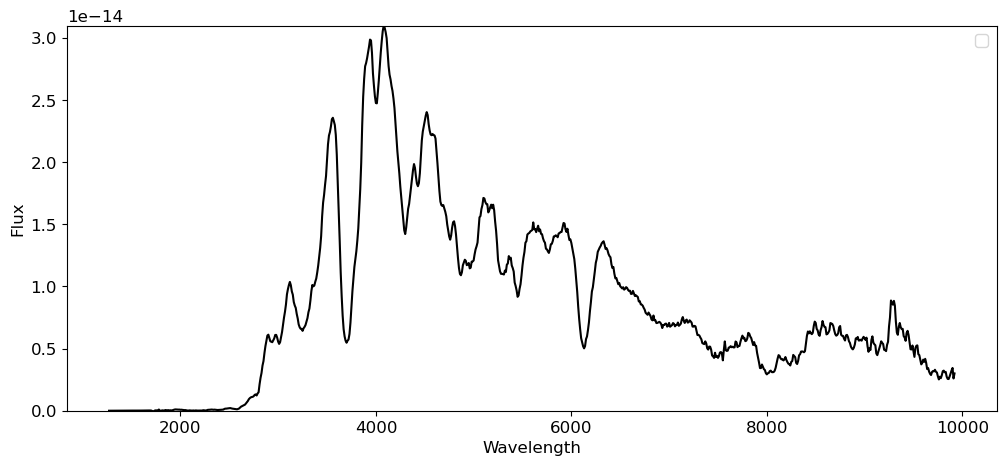

()

In [216]:
spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='original_spectra/SN2017erp_hst_20170629.dat'
spec3='original_spectra/SN2017erp_hst_20170629.dat'
spec4='original_spectra/SN2017erp_20170630_redblu_115432.082.ascii'
outputfilename='kcorrectiontemplates/SN2017erp_peak_11fe_appended.dat'
z1=0.000804
z2=0.006174
z3=0.006174
z4=0.006174
scale1=0.008
scale2=1
scale3=1
scale4=3.5
trim1=1710
trim2=4700
trim3=4900
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)



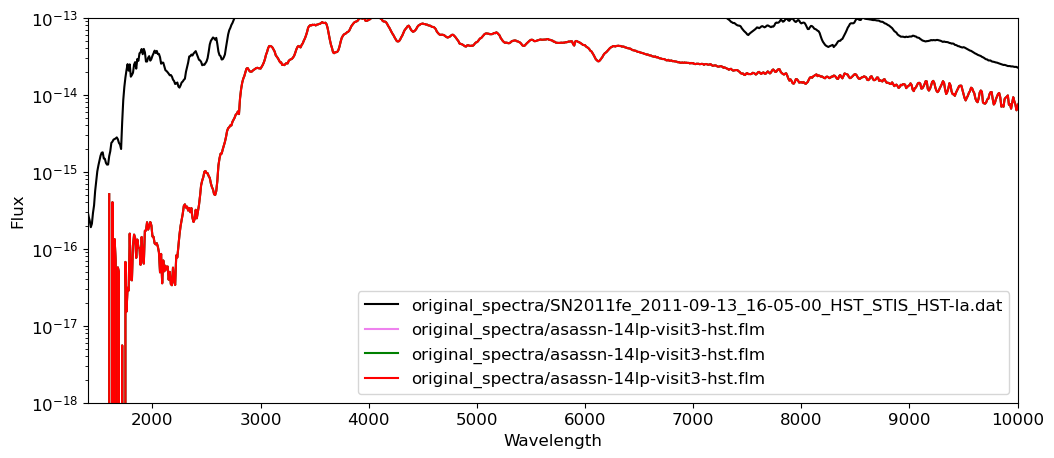

5.107835314894675e-16 erg / (Angstrom cm2 s)


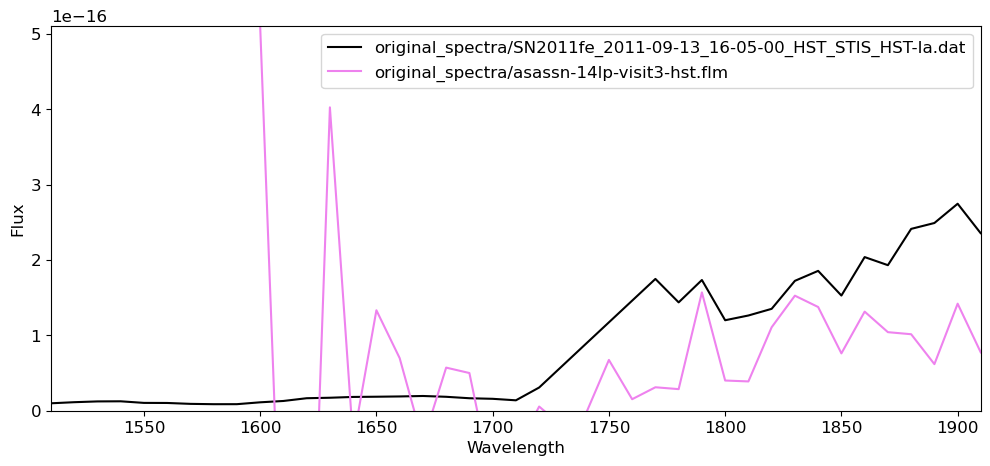

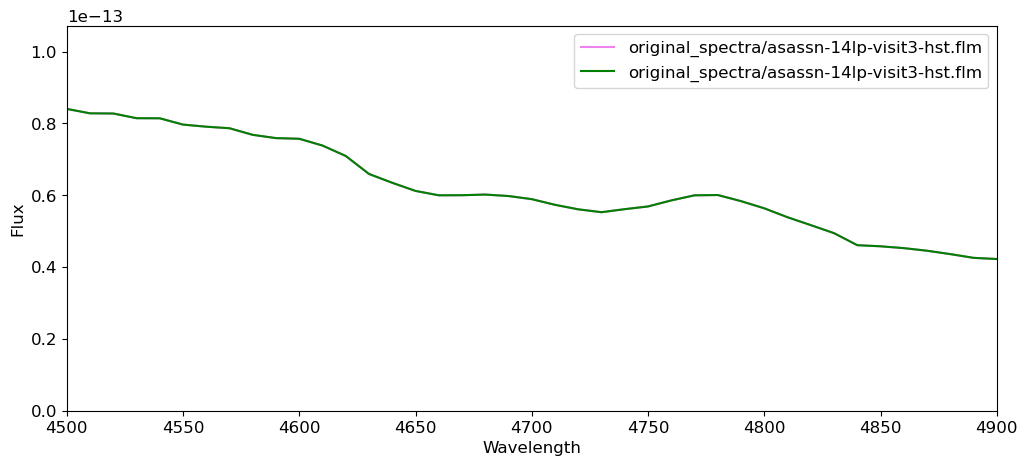

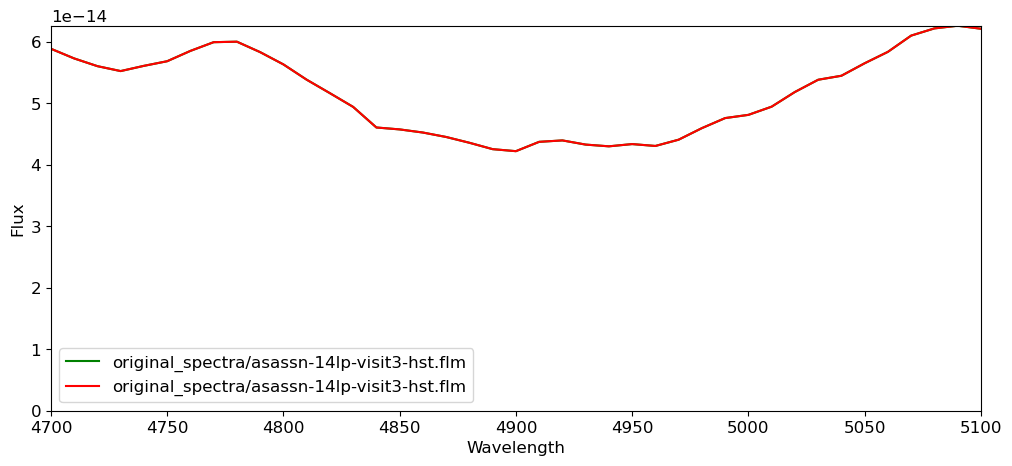

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


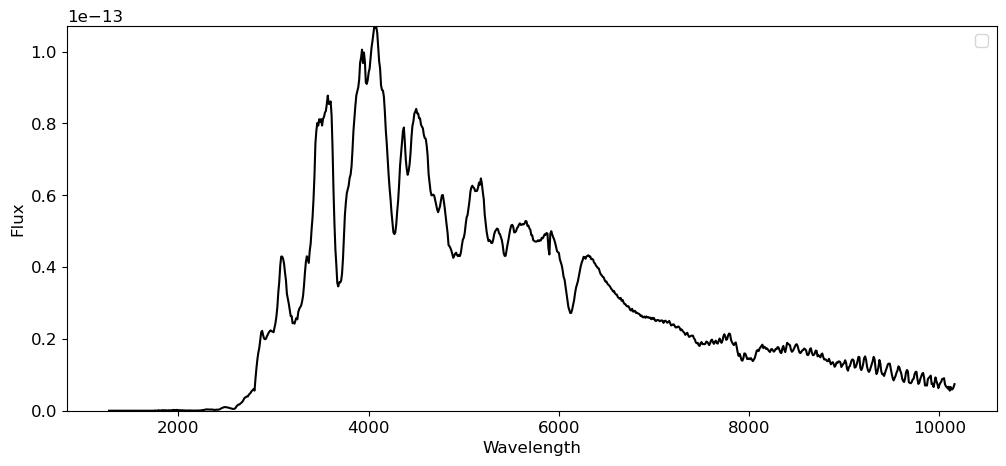

()

In [224]:
spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='original_spectra/asassn-14lp-visit3-hst.flm'
spec3='original_spectra/asassn-14lp-visit3-hst.flm'
spec4='original_spectra/asassn-14lp-visit3-hst.flm'
outputfilename='kcorrectiontemplates/ASASSN-14lp_peak_11fe_appended.dat'
z1=0.000804
z2=0.0051
z3=0.0051
z4=0.0051
scale1=0.007
scale2=1
scale3=1
scale4=1
trim1=1710
trim2=4700
trim3=4900
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)



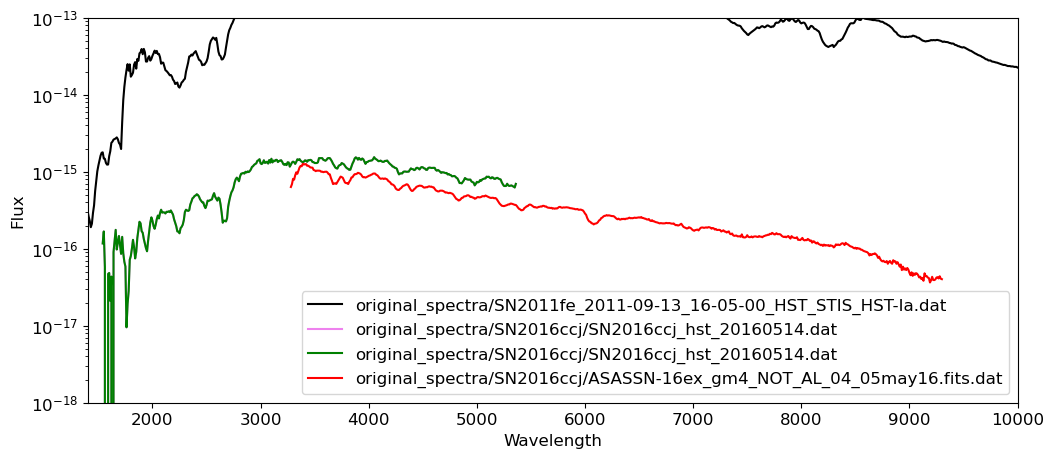

1.75720046731322e-16 erg / (Angstrom cm2 s)


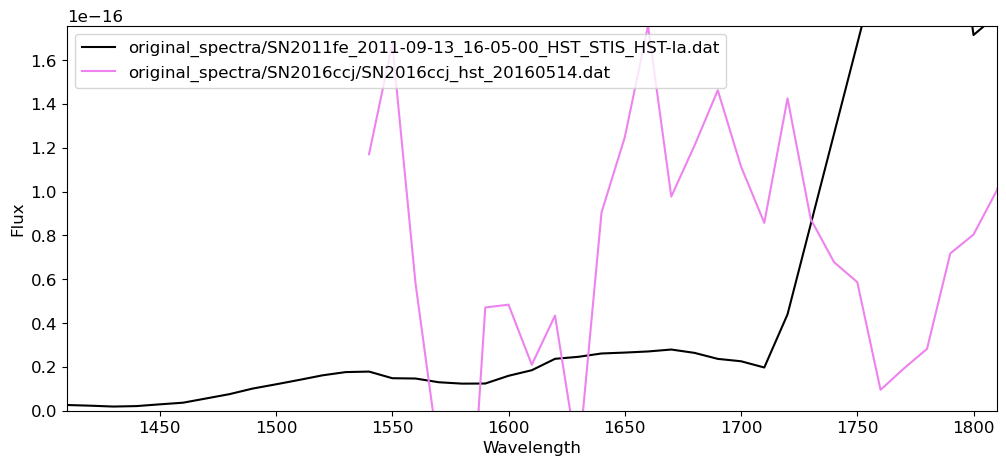

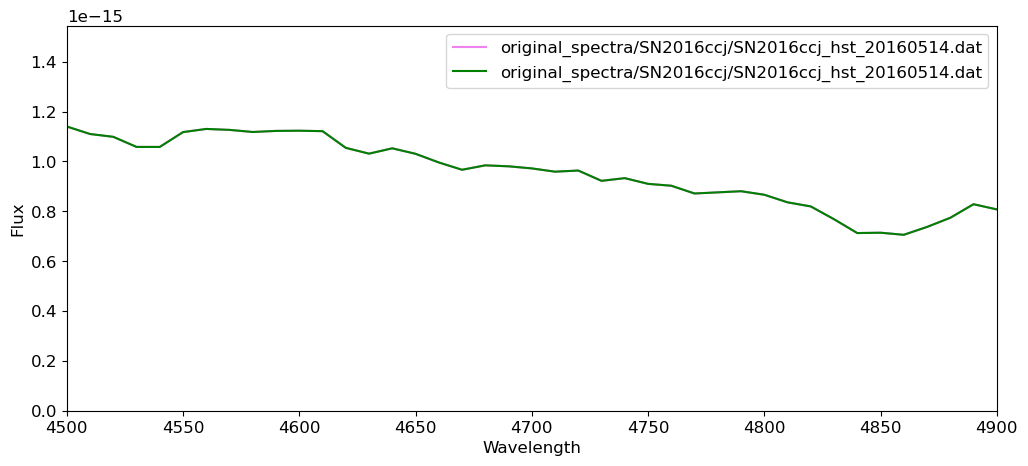

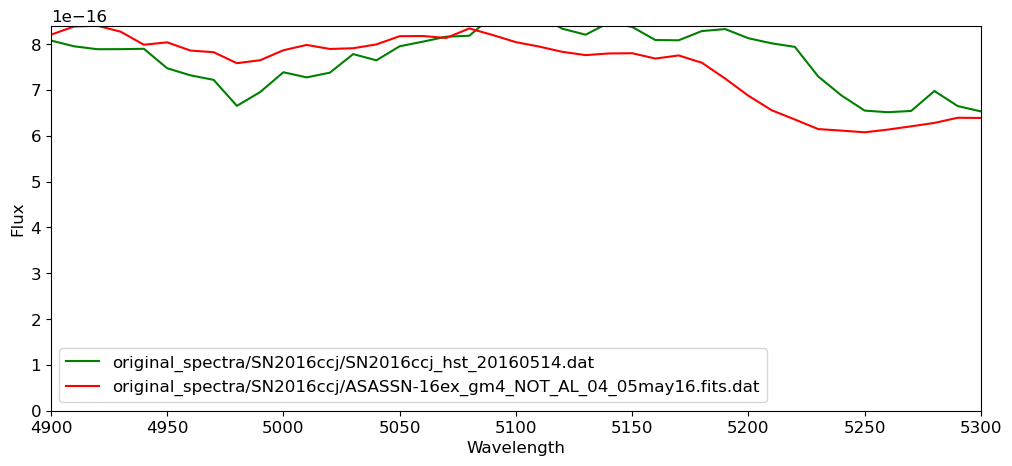

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


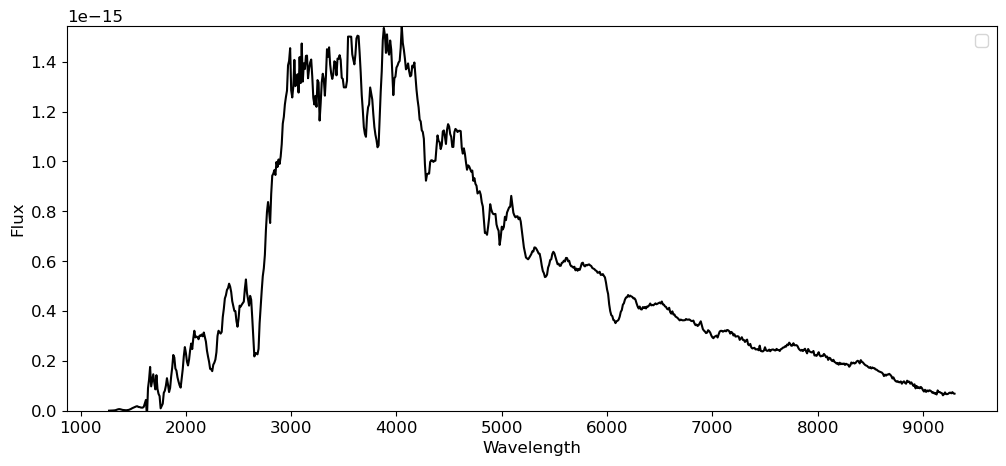

()

In [232]:


spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='original_spectra/SN2016ccj/SN2016ccj_hst_20160514.dat'
spec3='original_spectra/SN2016ccj/SN2016ccj_hst_20160514.dat'
spec4='original_spectra/SN2016ccj/ASASSN-16ex_gm4_NOT_AL_04_05may16.fits.dat'
outputfilename='kcorrectiontemplates/SN2016ccj_peak_11fe_appended.dat'
z1=0.000804
z2=0.0414
z3=0.0414
z4=0.0414
scale1=0.01
scale2=1
scale3=1
scale4=1.7
trim1=1610
trim2=4700
trim3=5100
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)



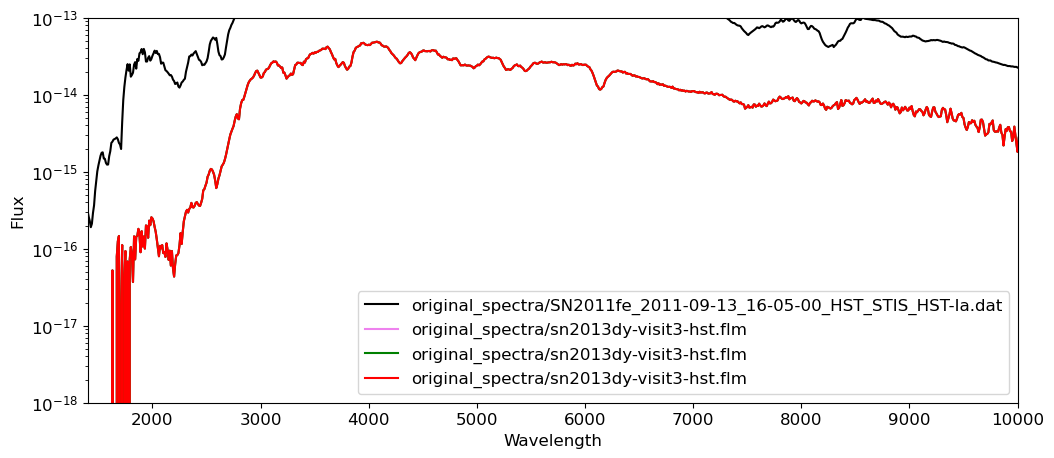

1.811863868043288e-16 erg / (Angstrom cm2 s)


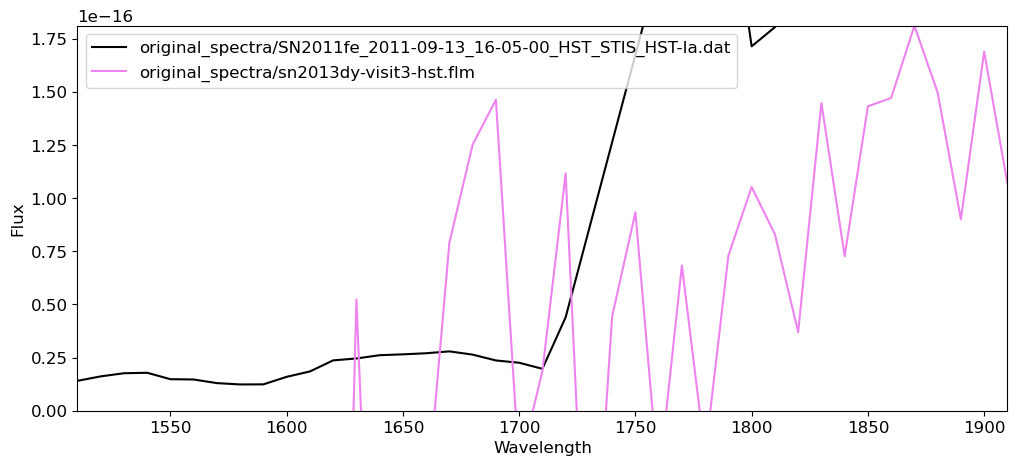

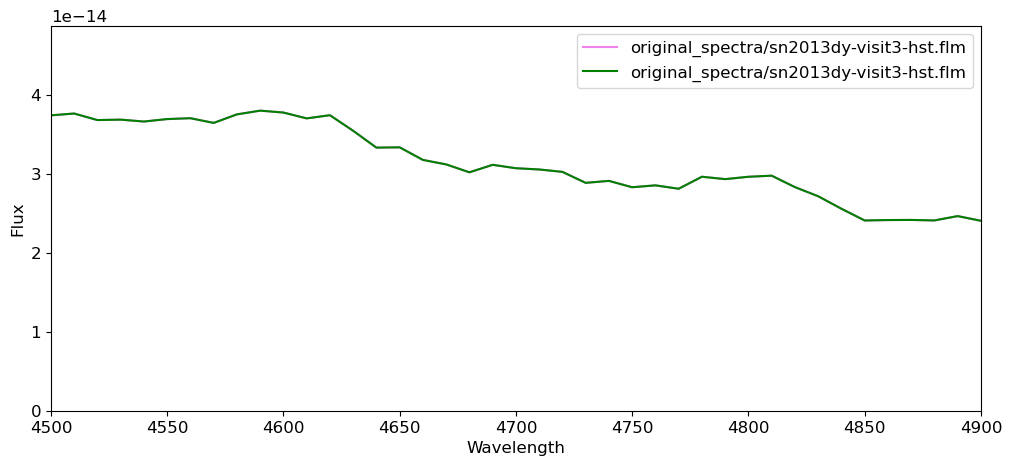

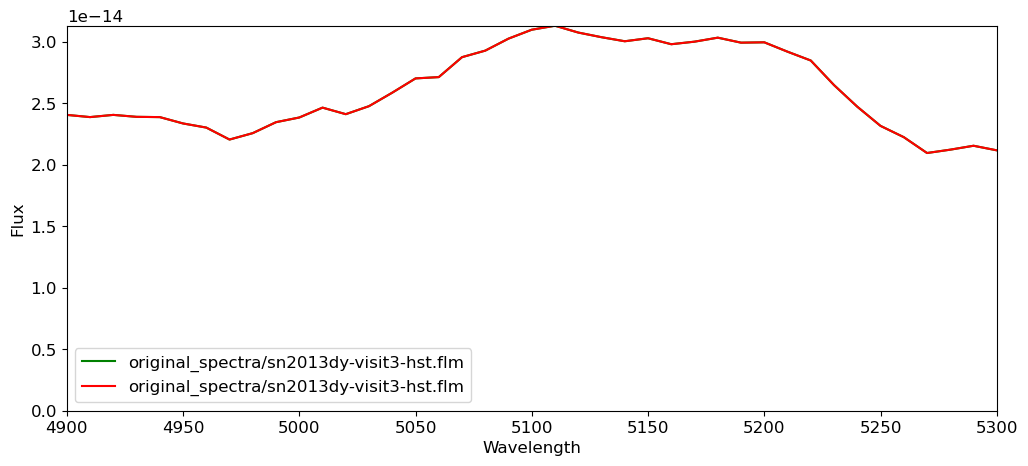

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


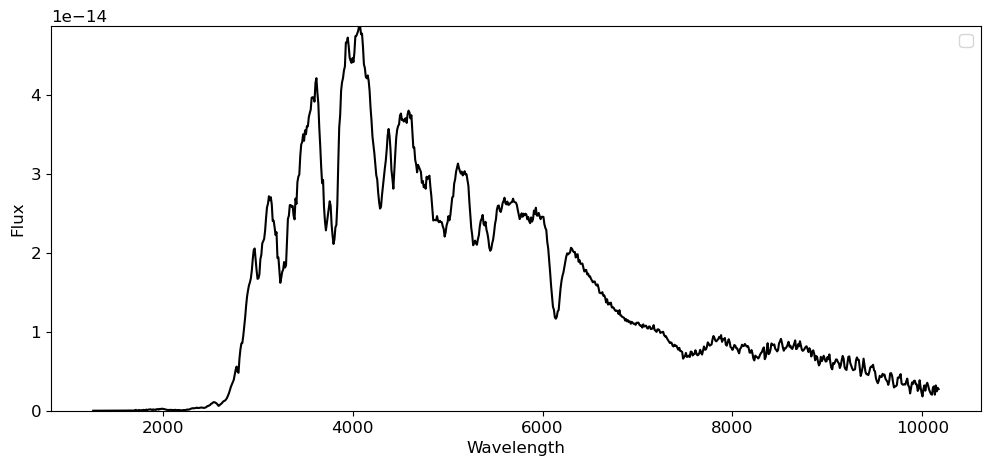

()

In [233]:

spec1='original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='original_spectra/sn2013dy-visit3-hst.flm'
spec3='original_spectra/sn2013dy-visit3-hst.flm'
spec4='original_spectra/sn2013dy-visit3-hst.flm'
outputfilename='kcorrectiontemplates/SN2013dy_peak_11fe_appended.dat'
z1=0.000804
z2=0.00389
z3=0.00389
z4=0.00389
scale1=0.01
scale2=1
scale3=1
scale4=1
trim1=1710
trim2=4700
trim3=5100
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)
